## Selecting parts of Pandas data frame

We create a Pandas data frame with babynames data.  We focus on how to select data.   For much more detailed background on Pandas data structures, see http://pandas.pydata.org/pandas-docs/dev/dsintro.html.

Let's cook up a bunch of 3 letter codes to label some data with.  The choice is fairly arbitrary.
We're just going to use them to label some data.

The next celel assujmes you've already run the gebneral_pandas_intro.ipynb noitebook and which guides you throuygh extracting the baby names data onto your Google Drive.

In [4]:
os.listdir('/content/gdrive/My Drive/data')

['state-abbrevs.csv',
 'Seattle2014.csv',
 'state-population.csv',
 'california_cities.csv',
 'state-areas.csv',
 'births.csv',
 'BicycleWeather.csv',
 'president_heights.csv',
 'names']

In [5]:
%matplotlib inline
from google.colab import drive
import pandas as pd
import os.path

drive.mount('/content/gdrive') 
data_dir = '/content/gdrive/My Drive/data'
os.chdir(data_dir)
def str_to_int (str0):
    return int(str0.replace(',',''))

cdict = dict(male=str_to_int,female=str_to_int,total=str_to_int)
names1881 = pd.read_csv('names/yob1881.txt',converters=cdict,names=['name','sex','births'])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
names1881.dtypes

name      object
sex       object
births     int64
dtype: object

Notice the rows are indexed with numbers.  We could if we wished assign an arbitrary set of code names to the rows,
and sequence of strings of the right length.  Here's a silly choice.

In [9]:
from string import ascii_lowercase
codes = [x + y + z for x in ascii_lowercase for y in ascii_lowercase for z in ascii_lowercase]
names1881.index = codes[:1935]

In [10]:
names1881

,name,sex,births
aaa,Mary,F,6919
aab,Anna,F,2698
aac,Emma,F,2034
aad,Elizabeth,F,1852
aae,Margaret,F,1658
...,...,...,...
cwg,Wiliam,M,5
cwh,Wilton,M,5
cwi,Wing,M,5
cwj,Wood,M,5


In [11]:
names1881['new'] = names1881['births']/100

In [12]:
names1881

,name,sex,births,new
aaa,Mary,F,6919,69.19
aab,Anna,F,2698,26.98
aac,Emma,F,2034,20.34
aad,Elizabeth,F,1852,18.52
aae,Margaret,F,1658,16.58
...,...,...,...,...
cwg,Wiliam,M,5,0.05
cwh,Wilton,M,5,0.05
cwi,Wing,M,5,0.05
cwj,Wood,M,5,0.05


The first ten columns.  Note the type is still a data frame, just a smaller one.

In [13]:
print(type(names1881[:10]))
names1881[:10]

<class 'pandas.core.frame.DataFrame'>


,name,sex,births,new
aaa,Mary,F,6919,69.19
aab,Anna,F,2698,26.98
aac,Emma,F,2034,20.34
aad,Elizabeth,F,1852,18.52
aae,Margaret,F,1658,16.58
aaf,Minnie,F,1653,16.53
aag,Ida,F,1439,14.39
aah,Annie,F,1326,13.26
aai,Bertha,F,1324,13.24
aaj,Alice,F,1308,13.08


Retrieve the column with the gender values, and display the last part.

In [14]:
names1881[['sex']].tail()

,sex
cwg,M
cwh,M
cwi,M
cwj,M
cwk,M


A vectorized Boolean test, returning a DataFrame that has one column, a column of Booleans.

In [16]:
print(type(names1881[['sex']]=='F'))
names1881[['sex']]=='F'

<class 'pandas.core.frame.DataFrame'>


,sex
aaa,True
aab,True
aac,True
aad,True
aae,True
...,...
cwg,False
cwh,False
cwi,False
cwj,False


You can pick out a subdata frame with only two columns.

In [17]:
print(type(names1881[['sex','births']]))
names1881[['sex','births']]

<class 'pandas.core.frame.DataFrame'>


,sex,births
aaa,F,6919
aab,F,2698
aac,F,2034
aad,F,1852
aae,F,1658
...,...,...
cwg,M,5
cwh,M,5
cwi,M,5
cwj,M,5


You can leave out one pair of square brackets to get another type of Pandas object called a Series.  A series is halfway from an array to a dataframe, basically an labeled array with one data type.  Notice the row names (or index) of the orginal data frame is preserved.

In [19]:
print(type(names1881['sex']))
names1881['sex']

<class 'pandas.core.series.Series'>


aaa    F
aab    F
aac    F
aad    F
aae    F
      ..
cwg    M
cwh    M
cwi    M
cwj    M
cwk    M
Name: sex, Length: 1935, dtype: object

You can think of a series as dictionary like, in that you retrieve data values with dictionary-like indexing.  But column indexing myst precde row indexing.

In [20]:
names1881['sex']['cvw']

'M'

You can ALSO retrieve data by numerical index.  The order in which the data has been read in preserved.  EITHER
kind of indexing works.  

In [21]:
names1881['sex'][0]

'F'

That's why a Series is referred to as an *ordered set* in the Pandas documentation.  There are no duplicate names, as with dictionary keys, but there is also ordering.

You can also create a Boolean series containing Booleans.  The following cell creates such a series and prints out the tail (the last few items in the ordering):

In [22]:
(names1881['name']=='Lee').tail()

cwg    False
cwh    False
cwi    False
cwj    False
cwk    False
Name: name, dtype: bool

Then you can use that series to create to create a much shorter sub data frame of the original data frame that has only the
rows with name *Lee*.

In [23]:
print(type(names1881['name']=='Lee'))
lee_rows = names1881[names1881['name']=='Lee']
print(type(lee_rows))
lee_rows

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births,new
ajy,Lee,F,39,0.39
blt,Lee,M,342,3.42


So `lee_rows` is a `DataFrame` containing only the rows for people named "Lee".  Unlike a `Series` a `DataFrame` can contain multiple columns.  We used the Boolean `[name]=='Lee'` `Series` as a Boolean-condition
to create the `lee_rows` `DataFrame`:

```
lee_rows = names1881[<Boolean-Condition>]
```

In particular, the Boolean-condition was:

```
lee_rows = names1881[names1881['name']=='Lee']
```

and using a Boolean Series to specify a Boolean condition is one very powerful technique for picking out a sub-`DataFrame` of a `DataFrame`.

This example also shows why we couldn't use the `name` column to index the data.  There are names that occur in two rows, because they are both male and female names.

You can also pick out a sub data frame with just the female names. We do that and print out the tail to show we've got a `female_rows` `DataFrame` with about half the data of the original `DataFrame`.

In [24]:
print(type(names1881['sex']=='F'))
female_rows = names1881[names1881['sex']=='F']
print(type(female_rows))
female_rows.tail()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births,new
bjx,Tinie,F,5,0.05
bjy,Tiny,F,5,0.05
bjz,Vernon,F,5,0.05
bka,Verona,F,5,0.05
bkb,Viney,F,5,0.05


In [25]:
female_rows.head()

,name,sex,births,new
aaa,Mary,F,6919,69.19
aab,Anna,F,2698,26.98
aac,Emma,F,2034,20.34
aad,Elizabeth,F,1852,18.52
aae,Margaret,F,1658,16.58


In [ ]:
female_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938 entries, aaa to bkb
Data columns (total 4 columns):
name      938 non-null object
sex       938 non-null object
births    938 non-null int64
new       938 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.6+ KB


In [ ]:
names1881.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1935 entries, aaa to cwk
Data columns (total 4 columns):
name      1935 non-null object
sex       1935 non-null object
births    1935 non-null int64
new       1935 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 155.6+ KB


## Aggregation

In [ ]:
names1881['births'].sum()

192703

This command summed all the the male and female name counts
for the year 1881.
So much for the year 1881.  Now let's look
at the other years, each of which is stored in its own file,
to see how combining Python's IO capabilities
with some panda data frame building tools,
provides a useful view of the data::

In [82]:
import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = 'names/yob{0:d}.txt'.format(year)
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

In [28]:
names[names['name']=='Mary']

,name,sex,births,year
0,Mary,F,7065,1880
1273,Mary,M,27,1880
2000,Mary,F,6919,1881
3238,Mary,M,29,1881
3935,Mary,F,8149,1882
...,...,...,...,...
1552547,Mary,F,3665,2007
1581614,Mary,M,9,2007
1587434,Mary,F,3478,2008
1622445,Mary,F,3132,2009


In [29]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


Think about why it's hard to build the list `pieces` with a list comprehension instead of  the way it's done in the above cell.
Notice the following doesn't work.  Python requires an expression
as the first component of a list comprehension.  One reason for this is that list comprehensions are supposed to improve readability.  Complex sequences of commands don't do that, and the `for`-loop above is much more understandable.

```
pieces = [f=pd.read_csv('names/yob{0:d}.txt'.format(year),names=columns);
          f['year']=year; f
          for year in years]
```

In [ ]:
names.head()

In [ ]:
names.tail()

In [ ]:
total_births0 = names.pivot_table('births','name', 
                                 aggfunc=sum)

In [ ]:
total_births0[:10]

name
Aaban          20
Aabid           5
Aabriella       5
Aadam         133
Aadan          69
Aadarsh       109
Aaden        2977
Aadesh         10
Aadhav         29
Aadhavan        5
Name: births, dtype: int64

In [ ]:
total_births0['Mary']

4119074

The value of `total_births0` is a `Series`, in effect a `pandas` column, because we want a single value for each babyname, the total number of births.  We can also use `pivit_table` to creatre a `DataFrame`.  This is for cases when we want each row to be associated with multiple kinds of aggregated information.

In [83]:
total_births = names.pivot_table('births','year', 
                                 columns='sex', aggfunc=sum)

This uses the `names` `DataFrame` to create a new `DataFrame` which aggregates the data by year and sex, summing the values of the `births` column in `names` for each year and sex.  The first argument gives the column whose values we will be summing over, in this `births`.  The second gives the column in `names` that will provide values for our rows.  This time we use `years`, so there will be one row for each year.  Then we add the specification `columns = 'sex'` because for each year we want one birth-sums for each possible value in the `sex` column, one for female names, one for male names.  So our pivot table has as many column as there are possible values in the `sex` column.

In [84]:
total_births[:10]

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


In [ ]:
total_births.tail()

In [ ]:
type(total_births)

pandas.core.frame.DataFrame

## Bar plots

Note that all the cells in this section contain the `plt.show` command. 
For this to work I **didn't** start ipython notebook with the `--pylab` option,
and I didn't use `%matplotlib inline`.  In  this mode, `plot` just computes a layout.
If you have been using `%matplotlib inline` or the `--pylab` option, and want to continue,
just comment out `plt.show()` below.

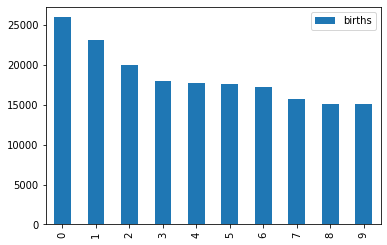

In [64]:
import pandas as pd
names2000 = pd.read_csv('names/yob2000.txt',names=['name','sex','births'])
names2000[:10].plot(kind='bar')

This is okay, but the bars are labeled with row numbers, since the row number is
the default way of indexing rows. The easiest way to fix this is to do it when we read in the data.

Note that loaded this way, 'name' is a column like the others, which can be indexed by label.

In [65]:
names2000[names2000['name']=='Mary']

,name,sex,births
46,Mary,F,6174
24291,Mary,M,10


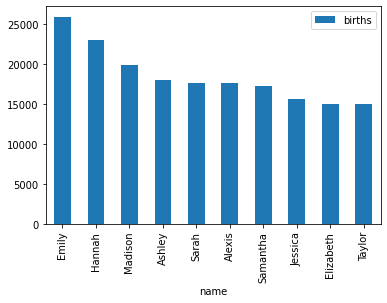

In [67]:
import pandas as pd
import matplotlib.pylab as plt
names2000 = pd.read_csv('names/yob2000.txt',names=['name','sex','births'],index_col='name')
ax = names2000[:10].plot(kind='bar')
#plt.show()

Again, ok,  but the labels are a little smushed.  Let's try rotating them a little.  Customizing plots ultimately requires knowing a bit `matplotlib`, the module that supplies all the plots that `pandas` can do.  The key point in understanding the code below is that the `plot` command returns something called an `axis` (roughly, one coordinate grid on which one or plots can be displayed.  An axis has `tick` labels for both the `x` and `y` direction,
and tehse ar eobjects that have a `set_rotation` method::

Note that loaded this way, `name` is being used as an index and cannot be used like a normal column label.

In [68]:
names2000[names2000['name']=='Mary']

KeyError: ignored

In [81]:
names2000.loc['Mary']

,sex,births
name,,
Mary,F,6174
Mary,M,10


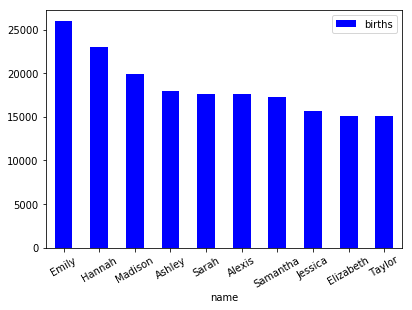

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
names2000 = pd.read_csv('names/yob2000.txt',names=['name','sex','births'],index_col='name')
# Note that the plot command returns the axis.  This is critical for getting
# at all kinds of fine tuning tools, as we're about to see.
ax = names2000[:10].plot(kind='bar')
# For this to work I DIDNT start ipython notebook with the --pylab option.
# This means the figure doesnt display until AFTER we give the plt.show() command.
labels = ax.get_xticklabels()
for label in labels:
    label.set_rotation(30)
plt.show()

The easiest way to learn how to customize is to read the Documentation for the `plot` method on the `DataFrame` class, which can be gotten at via any `DataFrame` instance as follows:

In [ ]:
print(names2000.plot.__doc__)

## Other Plotting

All data frames have a `plot` method, which will work quite intuitively for pivot table data frames.

In the cell below, the `plt.show` command is commented out.  Try it if you want to see the plot displayed in a separate window. Be warned that that won't work until you comment out `%matplotlib inline` and restart the notebook (which means you'll have to redefine `total_births`).

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
ax = total_births.plot(title='Total births by year') 
plt.show()

NameError: name 'total_births' is not defined

In [ ]:
total_births

## Alternative plotting script

In the cell below, the `plt.show` command is used.  This displays the plot in a separate window. Be warned that if you've been usinmg `matplotlib inline` that won't work until you comment out `%matplotlib inline` and restart the notebook (which means you'll have to redefine `total_births`).

The above graph is great and often what we want is just to take a quick look at the relationships in the data, and a data frame plot will do exactly the right thing with no customization.  It's helpful to know that `pandas` is using a Python packagge called `matplotlib` to draw the graph above, and we can do the same ourselves, with a lot more lines of code, but also with a lot more customization.

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.9,left=0.2)
ax1.set_ylabel('births')

ax1.set_xlabel('year')
(p1,) = ax1.plot(total_births.index,total_births.F,color='pink',label='F')
(p2, ) = ax1.plot(total_births.index,total_births.M,color='blue',label='M')
ax1.set_title('Total births by sex and year')
    
ax1.legend((p2,p1),('M','F'),loc='upper left',title='sex')
plt.show()

## Pandas cheat sheet

The following cheat sheet is taken from  http://www.swegler.com/becky/

List unique values in a DataFrame column

In [85]:
df = names1881

In [87]:
pd.unique(df.columns.ravel())

array(['name', 'sex', 'births', 'new'], dtype=object)

Read the `numpy` docs to make sure you understand what `ravel` does, and try the above line with and without the call to `ravel`.  Make sure you understand what type of object`pd.unique` returns.

Convert Series datatype to numeric, getting rid of any non-numeric values

In [ ]:
df['col'] = df['col'].astype(str).convert_objects(convert_numeric=True)

Grab DataFrame rows where column has certain values

In [ ]:
valuelist = ['value1', 'value2', 'value3']
df = df[df.column.isin(value_list)]

Grab DataFrame rows where column doesn't have certain values

In [ ]:
valuelist = ['value1', 'value2', 'value3']
df = df[~df.column.isin(value_list)]

Delete column from DataFrame

In [ ]:
del df['column']

Select from DataFrame using criteria from multiple columns

In [ ]:
newdf = df[(df['column_one']>2004) & (df['column_two']==9)]

Rename several DataFrame columns

In [ ]:
df = df.rename(columns = {
    'col1 old name':'col1 new name',
    'col2 old name':'col2 new name',
    'col3 old name':'col3 new name',
})

lower-case all DataFrame column names

In [ ]:
df.columns = list(map(str.lower, df.columns))

Even more fancy DataFrame column re-naming.

In [ ]:
df.rename(columns=lambda x: x.split('.')[-1], inplace=True)

Loop through rows in a DataFrame (if you must)

In [ ]:
for index, row in df.iterrows():
    print(index, row['some column'])

Lower-case everything in a DataFrame column

In [ ]:
df.column_name = df.column_name.str.lower()

Sort dataframe by multiple columns

In [ ]:
df = df.sort(['col1','col2','col3'],ascending=[1,1,0])

Get top n for each group of columns in a sorted dataframe (make sure dataframe is sorted first).

In [ ]:
top5 = df.groupby(['groupingcol1', 'groupingcol2']).head(5)

Grab DataFrame rows where specific column is null/notnull

In [ ]:
newdf = df[df['column'].isnull()]
len(newdf)

Select from DataFrame using multiple keys of a hierarchical index

In [ ]:
df.xs(('index level 1 value','index level 2 value'), level=('level 1','level 2'))

Change all NaNs to None (useful before loading to a db)

In [ ]:
df = df.where((pd.notnull(df)), None)

Slice values in a DataFrame column (aka Series)

In [ ]:
df.column.str[0:2]

Get quick count of rows in a DataFrame

In [ ]:
len(df.index)

Pivot data (with flexibility about what what becomes a column and what stays a row). Syntax works on Pandas >= .14

In [ ]:
pd.pivot_table(
  df,values='cell_value',
  index=['col1', 'col2', 'col3'], #these stay as columns
  columns=['col4']) #data values in this column become their own column

Change data type of DataFrame column

In [ ]:
df.column_name = df.column_name.astype(np.int64)

Get rid of non-numeric values throughout a DataFrame:

In [ ]:
for col in refunds.columns.values:
  refunds[col] = refunds[col].replace('[^0-9]+.-', '', regex=True)

Set DataFrame column values based on other column values

In [ ]:
df['column_to_change'][(df['column1'] == some_value) & (df['column2'] == some_other_value)] = new_value

Clean up missing values in multiple DataFrame columns

In [ ]:
df = df.fillna({
    'col1': 'missing',
    'col2': '99.999',
    'col3': '999',
    'col4': 'missing',
    'col5': 'missing',
    'col6': '99'
})

Concatenate two DataFrame columns into a new, single column (useful when dealing with composite keys, for example)

In [ ]:
df['newcol'] = df['col1'].map(str) + df['col2'].map(str)

Doing calculations with DataFrame columns that have missing values. 
In example below, swap in 0 for df['col1'] cells that contain null

In [ ]:
df['new_col'] = np.where(pd.isnull(df['col1']),0,df['col1']) + df['col2']

Split delimited values in a DataFrame column into two new columns

In [ ]:
df['new_col1'], df['new_col2'] = list(zip(*df['original_col'].apply(lambda x: x.split(': ', 1))))

Collapse hierarchical column indexes

In [ ]:
df.columns = df.columns.get_level_values(0)

Convert Django queryset to DataFrame

In [ ]:
qs = DjangoModelName.objects.all()
q = list(qs.values())
df = pd.DataFrame.from_records(q)

Create a DataFrame from a Python dictionary

In [ ]:
df = pd.DataFrame(list(a_dictionary.items()), columns = ['column1', 'column2'])